In [53]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [27]:
df = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/BUNDESBANK-BBK01_WT5511.csv",index_col=0)
df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


/tmp/ipykernel_37849/796625817.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  idx = pd.to_datetime( df.index ).to_period("M")


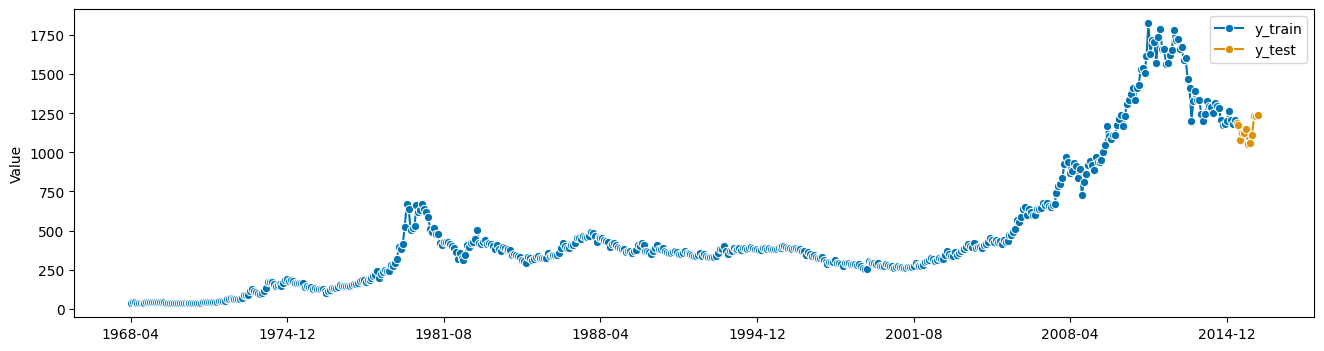

In [28]:
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

type(idx)

df.head()

y = df['Value']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

In [29]:

"""Specifying the Forecasting Horizon"""

fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', is_relative=False)

99.09521108005092


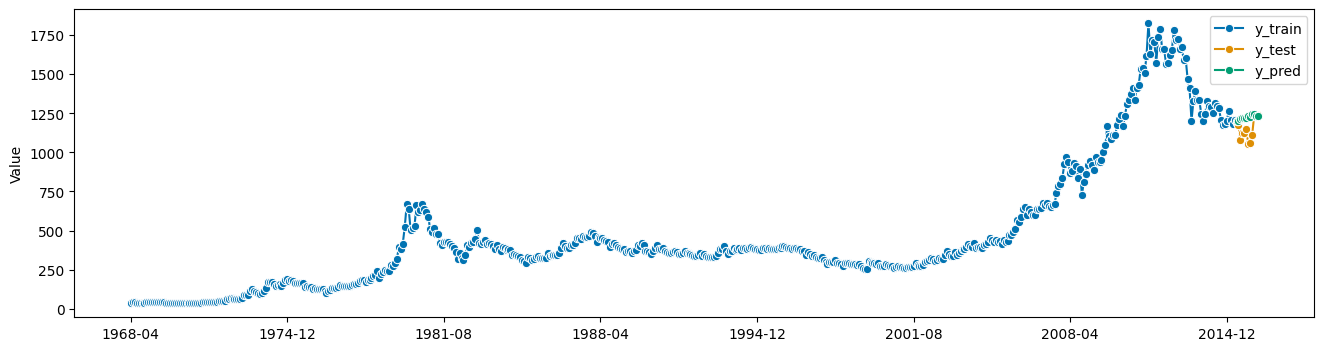

In [30]:
"""**Exponential Smoothing**"""

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))

6911.155780119796


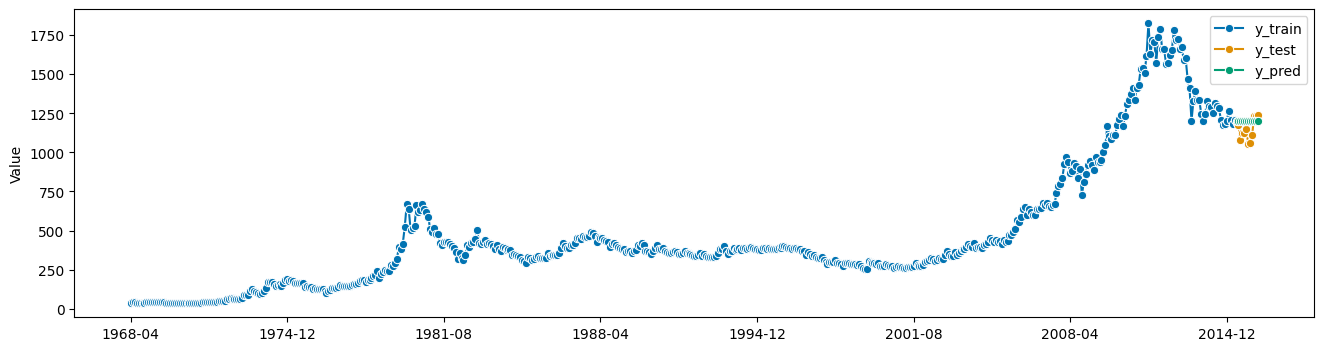

In [31]:
"""**ETS fitting**

Simple Exponential Smoothing
"""

forecaster = AutoETS(auto=False, sp=12,error='add',trend=None,seasonal=None)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

5641.11665718384
                                 ETS Results                                  
Dep. Variable:                  Value   No. Observations:                  565
Model:                       ETS(MAN)   Log Likelihood               -2462.997
Date:                Mon, 17 Jul 2023   AIC                           4935.993
Time:                        14:58:50   BIC                           4957.677
Sample:                    04-30-1968   HQIC                          4944.457
                         - 04-30-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.045     22.333      0.000       0.912       1.088
smoothing_trend     0.0496      0.020      2.522      0.012       0.011       0.088
initial_level  

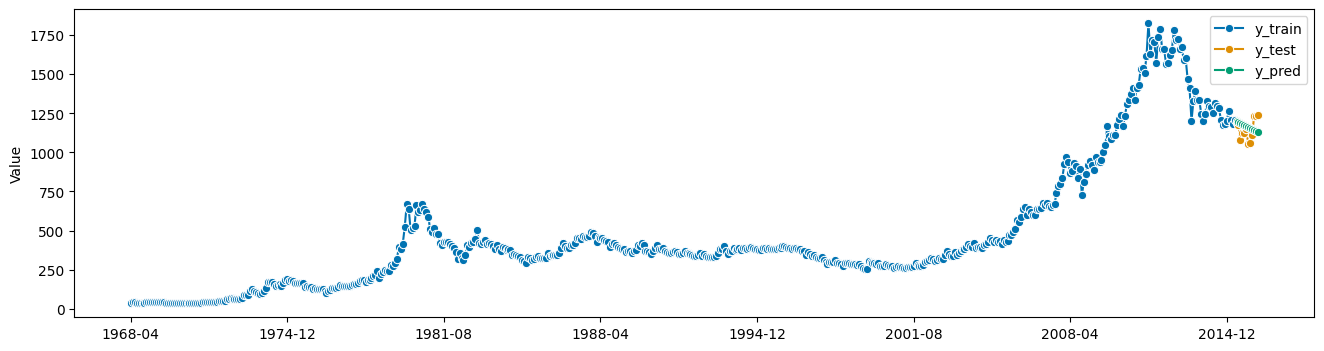

In [32]:

"""Auto-Tuned"""

forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

print(forecaster.summary())

## Air Passengers

In [65]:
df = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/AirPassengers.csv",index_col=0)
df


,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


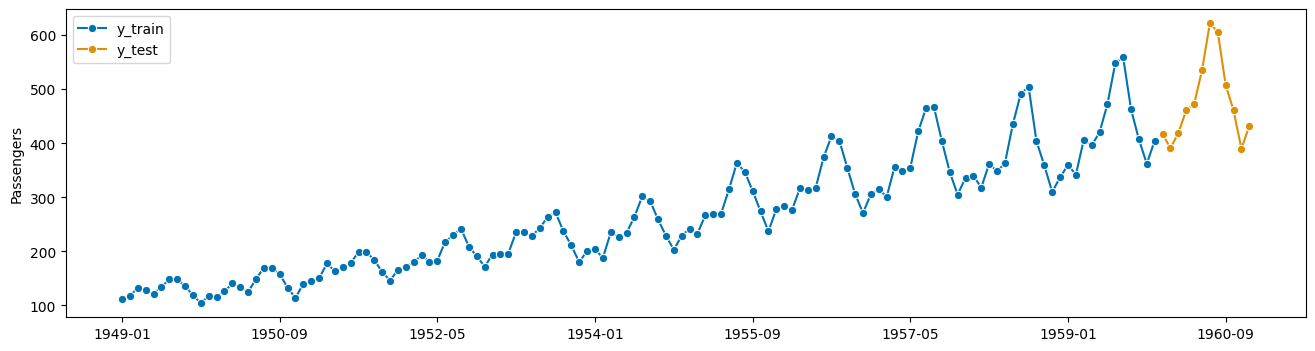

In [66]:
idx = pd.to_datetime( df.index, format='%Y-%m' ).to_period("M")
df.index = idx

type(idx)

df.head()

y = df['Passengers']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

16.979906128442913


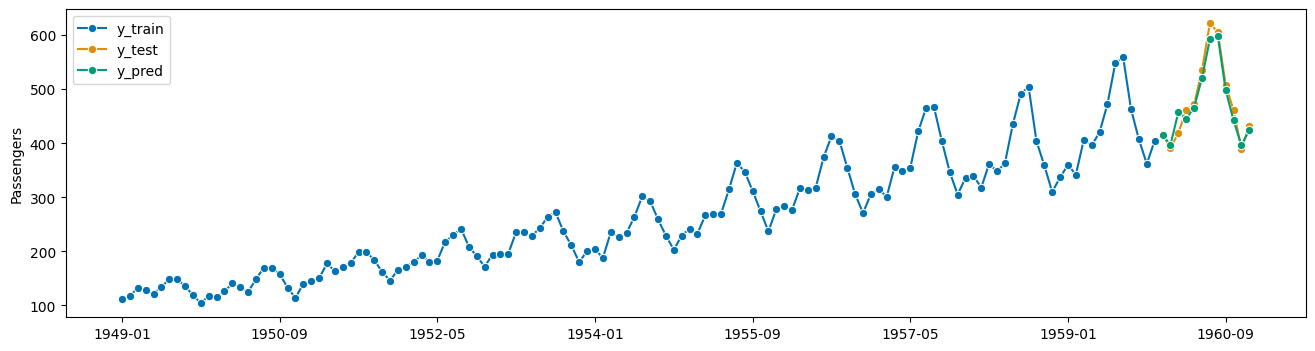

In [67]:

"""Specifying the Forecasting Horizon"""

fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

"""**Exponential Smoothing**"""

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))



10604.778654428159


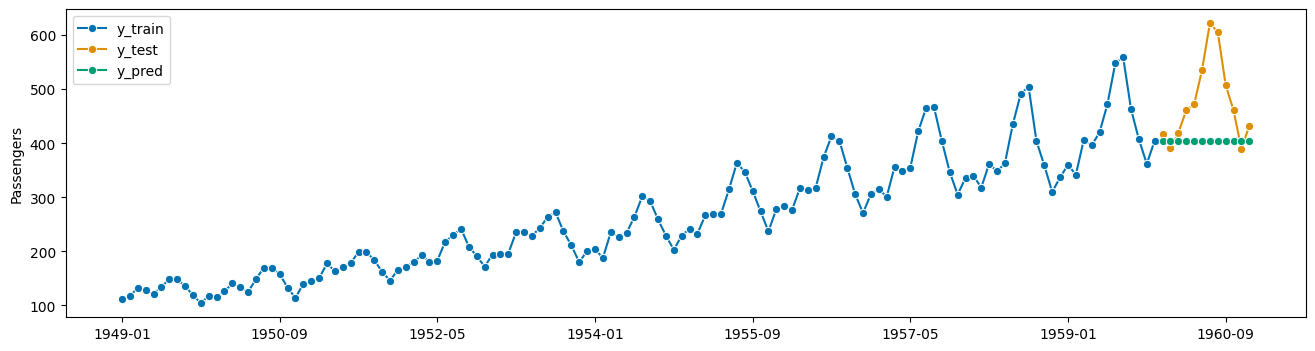

In [68]:
"""**ETS fitting**

Simple Exponential Smoothing
"""

forecaster = AutoETS(auto=False, sp=12,error='add',trend=None,seasonal=None)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))


651.5652185783621
                                 ETS Results                                  
Dep. Variable:             Passengers   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.385
Date:                Mon, 17 Jul 2023   AIC                            974.770
Time:                        15:27:32   BIC                           1026.661
Sample:                    01-31-1949   HQIC                           995.856
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.008      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         na

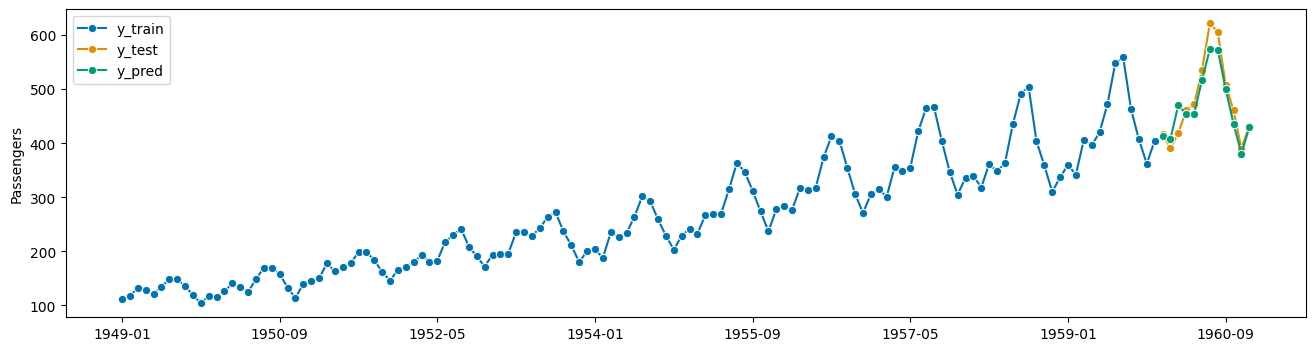

In [69]:
"""Auto-Tuned"""

forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

print(forecaster.summary())